## IMPORTING ALL THE REQUIRED LIBRARIES

In [19]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt # visualization
from sklearn.model_selection import train_test_split #split the data into training and validation
from sklearn.metrics import classification_report  # to get precision and recall
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression # linear regression model

## IMPORTING DATASET

In [20]:
df = pd.read_csv("PROJECTHRDATA.csv")

In [21]:
df

,NAME,AGE,YearsExperience,Salary,PHONE NO.,Unnamed: 5
0,Hermila,24.91,1.1,39343,479-539-4593,NaN
1,Antonio,27.61,4.5,61111,229-234-6154,NaN
2,Sebastian,36.87,3.9,63218,212-231-9912,NaN
3,Alec,43.19,2.0,43525,229-873-6796,NaN
4,Reggie,50.70,7.9,101302,314-677-4501,NaN
...,...,...,...,...,...,...
199995,Danial,50.76,10.5,121872,239-229-3765,NaN
199996,Derick,42.56,1.5,39343,270-931-4578,NaN
199997,Risa,26.21,3.7,57189,802-723-0715,NaN
199998,Kindra,25.00,9.5,116969,229-821-0751,NaN


## VISUALIZING YEARS OF EXPERIENCE

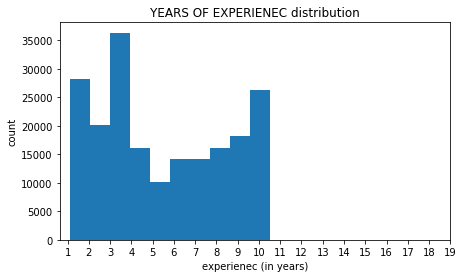

In [22]:
plt.hist(df['YearsExperience'])
plt.xlabel('experienec (in years)')
plt.ylabel('count')
plt.rcParams['figure.figsize']=(7,4)
plt.xticks(np.arange(1,20,1))
plt.title('YEARS OF EXPERIENEC distribution')
plt.show()


## VISULIZING AGE COLUMN

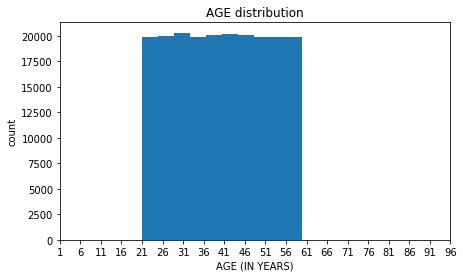

In [23]:
plt.hist(df['AGE'])
plt.xlabel('AGE (IN YEARS)')
plt.ylabel('count')
plt.rcParams['figure.figsize']=(7,4)
plt.xticks(np.arange(1,100,5))
plt.title('AGE distribution')
plt.show()

## CLEANING DATASET

In [24]:
char_cols = df.dtypes.pipe(lambda x : x[x == 'object']).index
label_mapping = {}

for d in char_cols :
    df[d],label_mapping[d] = pd.factorize(df[d])
df.head()

,NAME,AGE,YearsExperience,Salary,PHONE NO.,Unnamed: 5
0,0,24.91,1.1,39343,0,NaN
1,1,27.61,4.5,61111,1,NaN
2,2,36.87,3.9,63218,2,NaN
3,3,43.19,2.0,43525,3,NaN
4,4,50.70,7.9,101302,4,NaN


In [25]:
df.dtypes

NAME                 int64
AGE                float64
YearsExperience    float64
Salary               int64
PHONE NO.            int64
Unnamed: 5         float64
dtype: object

## DROPPING UNWANTED COLUMN

In [26]:
df = df.drop(columns=['NAME','PHONE NO.','AGE','Unnamed: 5'])
df.head()

,YearsExperience,Salary
0,1.1,39343
1,4.5,61111
2,3.9,63218
3,2.0,43525
4,7.9,101302


In [13]:
df

,YearsExperience,Salary
0,1.1,39343
1,4.5,61111
2,3.9,63218
3,2.0,43525
4,7.9,101302
...,...,...
199995,10.5,121872
199996,1.5,39343
199997,3.7,57189
199998,9.5,116969


## SPLITTING THE DATA INTO TRAINING AND TESTING

In [33]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

## USED LINEAR REGRESSION MODEL

In [35]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
y_pred = regressor.predict(X_test)

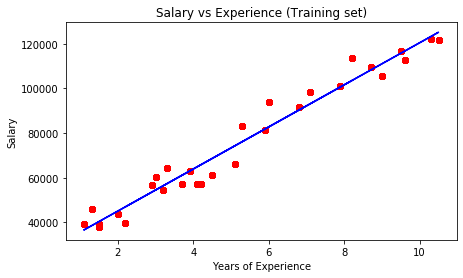

In [37]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

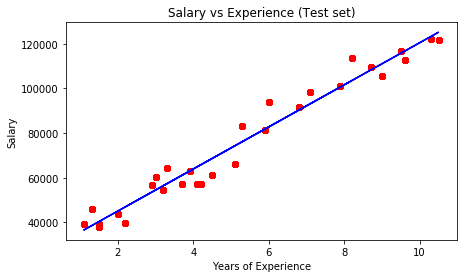

In [38]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## CHECKING ACCURACY OF OUR MODEL

In [42]:
regressor.score(X_train,y_train)

0.9643886677392557

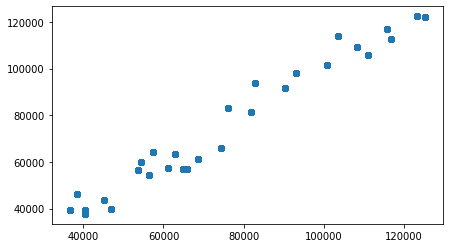

In [43]:
import matplotlib.pyplot as plt
plt.scatter(y_pred,y_test)

## predicting the salary based on Experience (in years)

In [40]:
a=int(input('Experience(in years) = '))

ans=regressor.predict([[a]])
print('Salary estimated for a person having the given experience is',round(ans[0],2))

Experience(in years) = 8
Salary estimated for a person having the given experience is 101640.04
